<a href="https://colab.research.google.com/github/regina-fonseca-avila/data_science/blob/main/linear_regression/variaveis_correlacionadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **REGRESSÃO LINEAR**
DUAS VARIÁVEIS CORRELACIONADAS


<img src= 'https://cdn-icons-png.flaticon.com/512/2103/2103640.png'>

Vamos estudar qual é o efeito de utilizar duas varáveis correlacionadas linearmente na regressão linear.

# Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Dados

Vamos gerar um conjunto de dados para o nosso estudo.

### Gerando conjunto de dados

In [2]:
# x1 no intervalo [0,30] 
np.random.seed(seed=0)
x1 = 30 * np.random.random(100)

# x2
x2 = 2*x1 + 0.25
#
np.random.seed(seed=2)
y = 2.5*x1 + 1.25 + 2*np.random.normal(size=x1.shape)

dados = pd.DataFrame({'x1':x1, 'x2': x2, 'y':y})
dados.head()

,x1,x2,y
0,16.464405,33.178810,41.577497
1,21.455681,43.161362,54.776669
2,18.082901,36.415803,42.184861
3,16.346495,32.942991,45.396780
4,12.709644,25.669288,29.437239


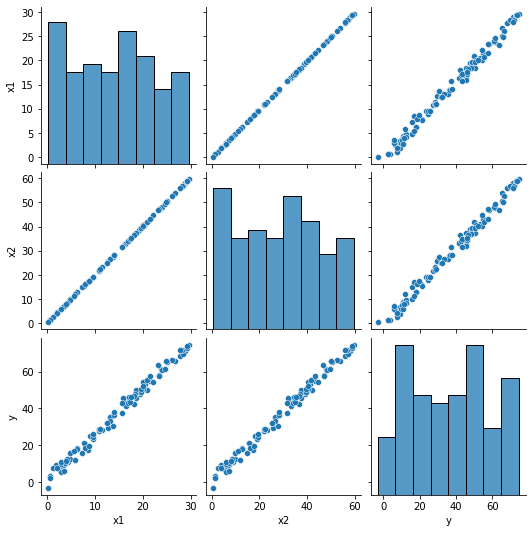

In [3]:
sns.pairplot(dados)

Temos $y$ correlacionado linearmente a $x_1$ e $x_2$ e também $x_1$ e $x_2$ correlacionados entre si.

## Visualizando os dados em um gráfico 3D

Text(0.5, 0, 'y')

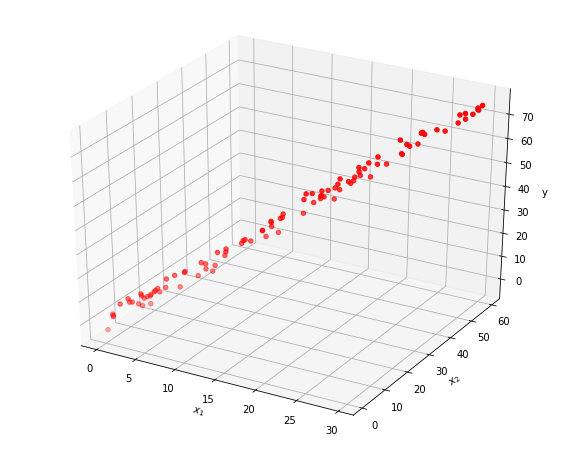

In [4]:
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y, c='red', marker='o')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('y')


# Problema

- Tenho pontos $X = (x_1,x_2,\ldots,x_k) $ e $y$
- Quero prever $y(X)$

Como pode ser resolvido? Utilizando regressão linear.

# Regressão Linear

Assumindo que $y$ pode ser escrito da seguinte forma

$$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_k x_k$$

onde

$X = (x_1,x_2,\ldots,x_k) $

$ \beta = (\beta_0,\beta_1,\beta_2,\ldots,\beta_k)$ 

Vamos encontrar $\beta$ que minimize a soma

$$\chi^2 = \sum_{i=1}^{n}\left(y(\beta,X_i)-y_i\right)^2$$
onde 

$n$ = número de amostras

medir com erro quadro ver (https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py)

# Modelo 1 - Uma variável e duas constantes para determinar

$$y = \beta_0 + \beta_1 x_1$$

In [5]:
# Treino - regressão linear
model_1 = LinearRegression()
model_1.fit(dados[['x1']], dados[['y']])

LinearRegression()

In [6]:
# previsão
y_model_1_pred = model_1.predict(dados[['x1']])

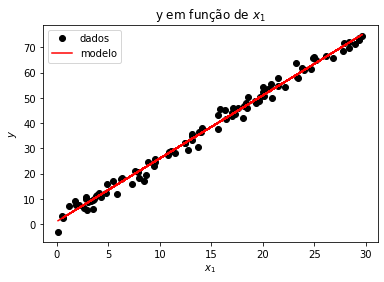

In [7]:
# gráfico dos resultados
plt.plot(x1,y,'ko',label='dados')
plt.plot(x1, y_model_1_pred, 'r-', label = 'modelo')
plt.title('y em função de $x_1$')
plt.ylabel('$y$')
plt.xlabel('$x_1$')
plt.legend(loc='best')

## Coeficientes do modelo

In [8]:
model_1_beta_0 = np.round(model_1.intercept_[0],3)
model_1_beta_1 = np.round(model_1.coef_[0][0],3)

print('beta_0: {}'.format(model_1_beta_0))
print('beta_1: {}'.format(model_1_beta_1))

beta_0: 1.088
beta_1: 2.497


In [9]:
# Erro quadr^´atico médio
print("Mean squared error: %.2f" % mean_squared_error(y, y_model_1_pred))
# Coeficiente de determinação: 1 é a predição perfeita
print("Coefficient of determination: %.2f" % r2_score(y, y_model_1_pred))

Mean squared error: 4.30
Coefficient of determination: 0.99


Será que obtemos uma descrição melhor dos dados se acrescentarmos mais uma variável? Vamos testar!

## Modelo 2 - Duas variáveis e 3 constantes para determinar

$$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2$$

In [10]:
# Treino - regressão linear
model_2 = LinearRegression()
model_2.fit(dados[['x1','x2']], dados[['y']])

LinearRegression()

In [11]:
# previsão
y_model_2_pred = model_2.predict(dados[['x1','x2']])

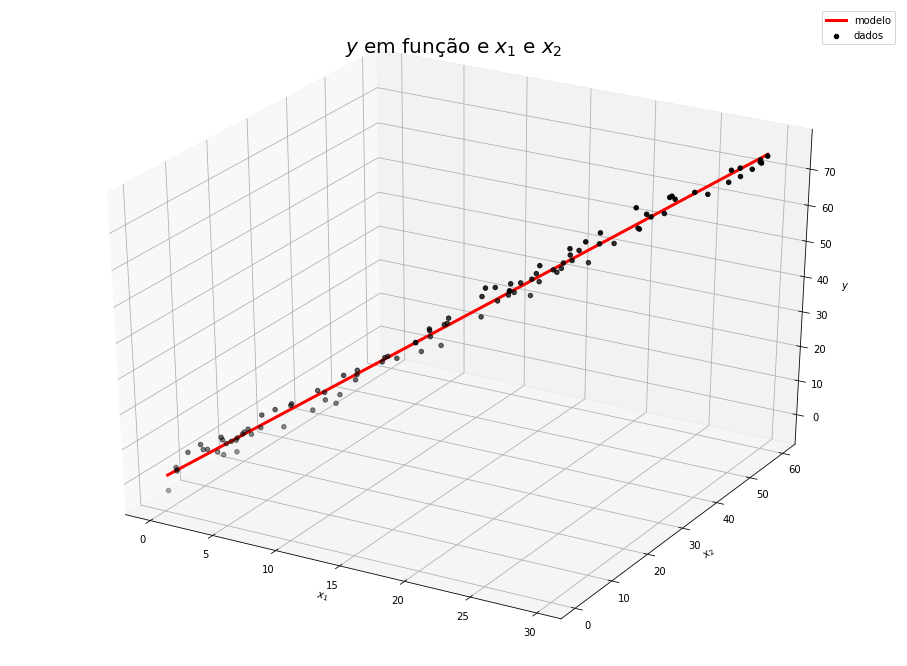

In [12]:
# Dados para o gráfico

model_2_feature_and_pred = pd.DataFrame(np.column_stack((x1,x2,y_model_2_pred.reshape(-1))),
                                        columns = ['x1','x2','y_model_2_pred'])

# ordenando valores por x1
model_2_feature_and_pred = model_2_feature_and_pred.sort_values('x1')

# gráfico
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111, projection='3d')

# dados
ax.scatter(x1, x2, y,
           color='k',
           marker = 'o',
           label = 'dados')

# modelo
ax.plot(model_2_feature_and_pred['x1'], 
        model_2_feature_and_pred['x2'],
        model_2_feature_and_pred['y_model_2_pred'],
        c='red',
        linewidth=3,
        label = 'modelo')

# nomeando os eixos
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$y$')

# título
ax.set_title('$y$ em função e $x_1$ e $x_2$',
             fontsize = 20)
# legenda
plt.legend(loc='best')

## Coeficientes do modelo

In [13]:
model_2_beta_0 = model_2.intercept_[0]
model_2_beta_1 = model_2.coef_[0][0]
model_2_beta_2 = model_2.coef_[0][1]

print('beta_0: {:.3f}'.format(model_2_beta_0))
print('beta_1: {:.3f}'.format(model_2_beta_1))
print('beta_2: {:.3f}'.format(model_2_beta_2))

beta_0: 0.838
beta_1: 0.499
beta_2: 0.999


In [14]:
# Erro quadrático médio
print("Erro quadrático médio: {:.2f}".format(mean_squared_error(y, y_model_2_pred)))
# Coeficiente de determinação
print("Coeficiente de determinação: {:.2f}".format(r2_score(y, y_model_2_pred)))

Erro quadrático médio: 4.30
Coeficiente de determinação: 0.99


O erro diminiu muito pouco e o coeficiente de determinação ficou igual.

In [15]:
print('Modelo 1')
# Erro quadrático médio
print("Erro quadrático médio: {:.2f}".format(mean_squared_error(y, y_model_1_pred)))
# Coeficiente de determinação
print("Coeficiente de determinação: {:.2f}".format(r2_score(y, y_model_1_pred)))


print('')
print('Modelo 2')
# Erro quadrático médio
print("Erro quadrático médio: {:.2f}".format(mean_squared_error(y, y_model_2_pred)))
# Coeficiente de determinação
print("Coeficiente de determinação: {:.2f}".format(r2_score(y, y_model_2_pred)))

print('')
print("Erro quadrático médio 2 / Erro quadrático médio 1: {:.4f}"\
      .format(mean_squared_error(y, y_model_2_pred) / mean_squared_error(y, y_model_1_pred)))

Modelo 1
Erro quadrático médio: 4.30
Coeficiente de determinação: 0.99

Modelo 2
Erro quadrático médio: 4.30
Coeficiente de determinação: 0.99

Erro quadrático médio 2 / Erro quadrático médio 1: 1.0000


# Análise dos resultados

Vimos que adicionar $x_2$ não traz resultados melhores. Vamos entender porque isto acontece.

As variáveies $x_1$ e $x_2$ são correlacionadas como podemos ver no gráfico e também quando calculamos a correlação entre elas.

Text(0.5, 0, 'x1')

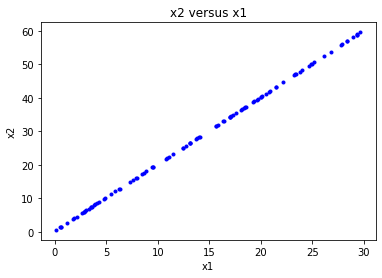

In [16]:
plt.plot(x1,x2,'b.')
plt.title('x2 versus x1')
plt.ylabel('x2')
plt.xlabel('x1')

In [17]:
# correlação entre a coluna x1 e a coluna x2
print("Correlação entre x1 e x2: {}".format(dados['x1'].corr(dados['x2'])))

Correlação entre x1 e x2: 0.9999999999999998


A correlação é forte, muito próxima a 1. Isto já era esperado pois $x_2$ foi construído da seguinte forma:

$$ x_2 = 2x_1 + 0.25.$$

E como isto se reflete nos coeficientes do modelo?

O modelo 2 tem a forma

$$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2$$

Lembrando que 

$$x_2 = 2x_1+0.25$$

e substituindo no Modelo 2

$$y = \beta_0 + \beta_1 x_1 + \beta_2(2x_1+0.25)$$

e reagrupando os termos, obtemos

$$ y = (\beta_0 + 0.25\beta_2) + (\beta_1 +2\beta_2) x_1 .$$

A expressão acima tem a mesma forma do modelo 1: 

$$y = \bar{\beta}_0 + \bar{\beta}_1 x_1,$$

um termo independente, 

$$\bar{\beta}_0 = \beta_0 + 0.25\beta_2 $$

e uma constante, 
 
$$\bar{\beta}_1 = \beta_1 +2\beta_2,$$ 

que multiplica $x_1$ .

Quando substituímos os valores de $\beta_0$, $\beta_1$ e $\beta_2$ encontrados quando ajustamos o modelo 2 nas expressões para $\bar{\beta}_0$ e $\bar{\beta}_1$ obtemos:

In [18]:
print('beta_bar_0: {:.3f}'.format(model_2_beta_0 + 0.25*model_2_beta_2))
print('beta_bar_1: {:.3f}'.format(model_2_beta_1 + 2*model_2_beta_2))

beta_bar_0: 1.088
beta_bar_1: 2.497


E vemos que o resultado obtido são os parâmetros obtidos quando ajustamos o modelo 1.

In [19]:
print('beta_0: {:.3f}'.format(model_1_beta_0))
print('beta_1: {:.3f}'.format(model_1_beta_1))

beta_0: 1.088
beta_1: 2.497


O resultado acima explica porque o erro obtido com os dois modelos foi o mesmo, pois temos  mesmo modelo, apenas escrito de forma diferente.

Se tivessemos utilizado apenas $x_2$ como variável a predição para $y$ ainda seria a mesma. Os coeficientes $\beta_0$ e $\beta_1$ diferentes mas se fizermos a mesma substituição acima lembrando que $x_2$ é função de $x_1$ veríamos que estamos de novo com o mesmo modelo.

Também é interessante destacar que $\beta_0$ e $\beta_1$ são bem próximos aos valores do coeficiente angular e do parâmetro independente da função original, utilizada para gerar dos dados utilizados aqui.

$$ y = 2.5x_1 + 1.25 $$ 

# Conclusão

É importante verificarmos se temos variáveis correlacionadas linearmente antes de treinar os modelos. Vimos acima um exemplo de que utilizar relacionadas desta forma não adiciona informação relevante na descrição dos dados. Num problema simples podemos não perceber a diferença no tempo e nem nos parâmetros, mas num problema mais complexo, com mais variáveis, com outros tipos de modelo podemos ter mais tempo gasto, pois temos mais variáveis, conclusões equivocadas sobre variáveis mais importante entre outros problemas.

Aqui utilizamos duas variáveis perfeitamente correlacionadas na prática podemos não ter correlações tão altas assim mas é importante avaliarmos se a inclusão destas variáveis está ou não melhorando a descrição dos dados ou simplemente adiconandando mais uma variável.